Is this a classification or regression task and why?

Answer: This is a classification task because we label the 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# How many observations are there in total?
print(len(df))



303


In [5]:
#Are there any missing values? 
print(df.info()) 
print("There is no missing value in the data")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
There is no missing value in the data


In [6]:
# How many unique values are in each column?
for column in df:
    print(column, df[column].nunique())


age 41
sex 2
cp 4
trtbps 49
chol 152
fbs 2
restecg 3
thalachh 91
exng 2
oldpeak 40
slp 3
caa 5
thall 4
output 2


Which columns will you treat as categorical, which will you take as continuous, and why?

Categorical: sex, cp, fbs, restecg, exng, slp, caa, thall, output
Continuous: age, trtbps, chol, thalachh, oldpeak

The categorical columns have a limited number of distinct values, such as 0,1,2 so we can represent specific categories or levels. The continuous columns have a range of numerical values that can be measured on a continuous scale.

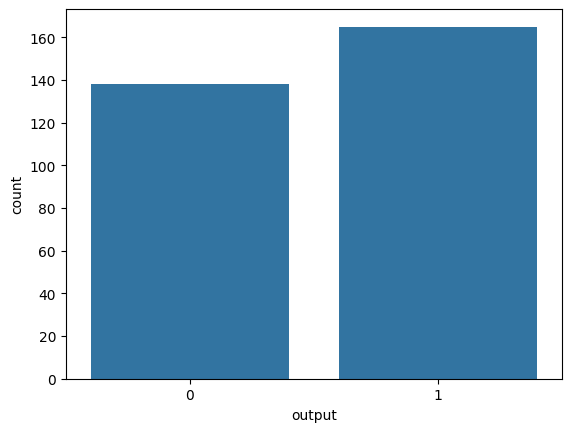

In [7]:
sns.countplot(x=df['output'])
plt.show()

The data set is not balanced, there are marginally more people with heart attacks. 

Working with a balanced dataset is important because imbalanced datasets can lead to biased models that perform poorly on the minority class. This is particularly crucial in medical applications where false negatives (missing a potential heart attack) can have severe consequences.

We can deal with an imbalanced dataset using:
- Oversampling the minority class
- Undersampling the majority class
- Adjusting class weights in the model
- Using ensemble methods like Random Forest or Gradient Boosting
- Collecting more data for the minority class


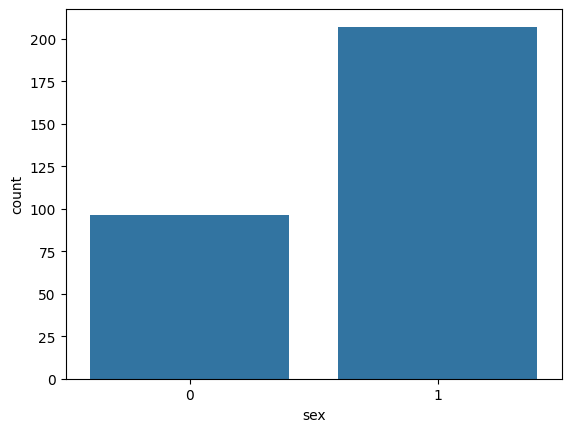

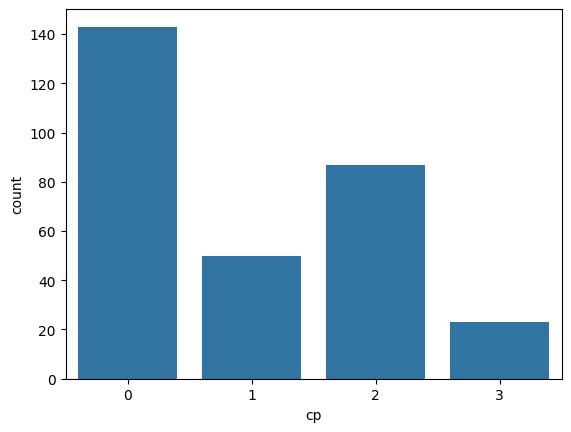

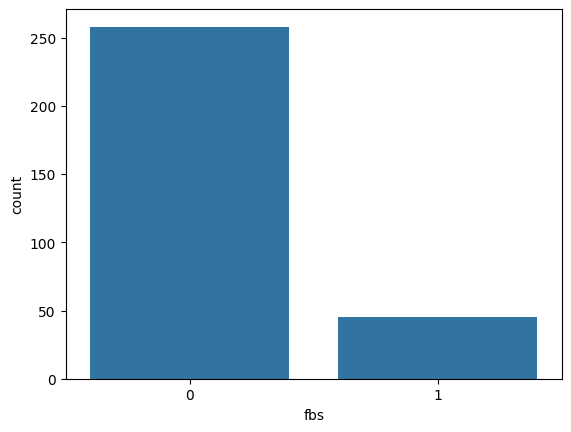

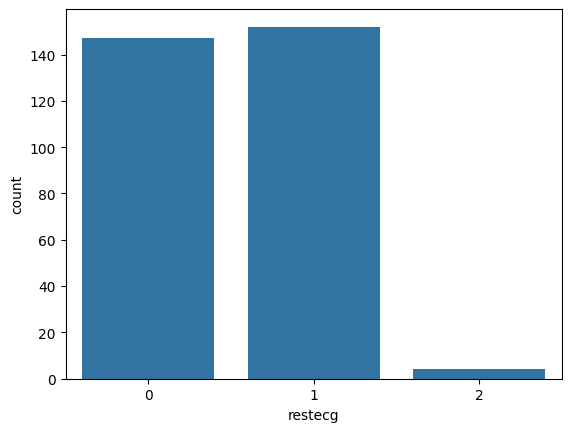

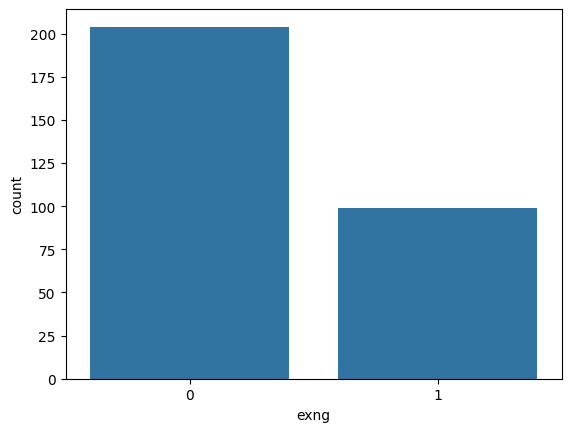

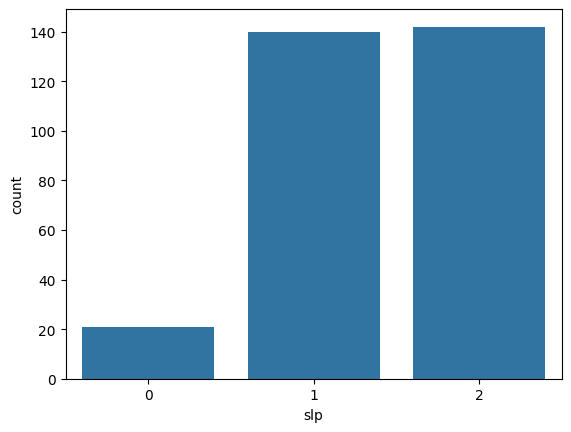

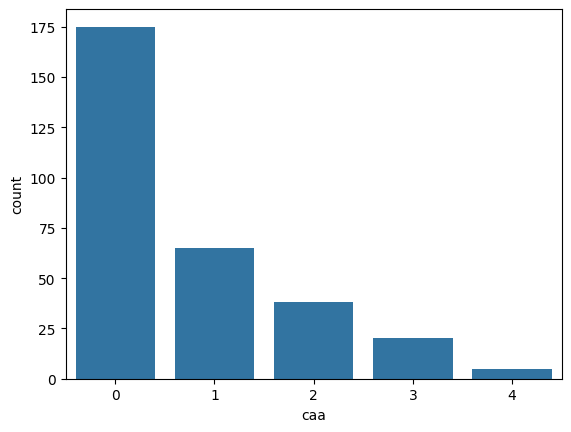

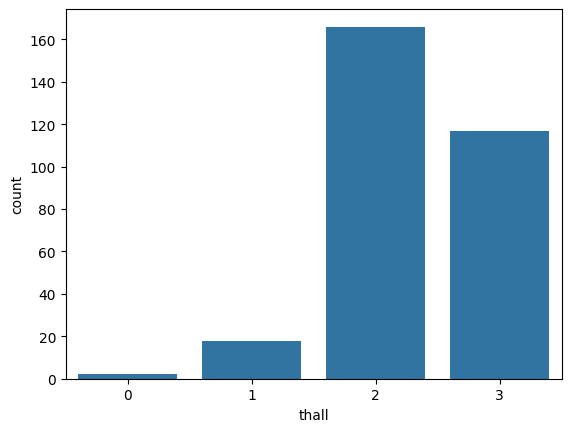

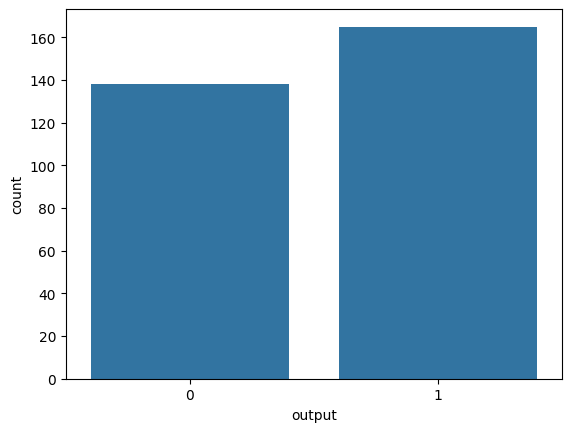

In [8]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
for col in cat_cols:
    sns.countplot(x=df[col])
    plt.show()


Key findings: 
- The amount of female participants were doubled compared to male
- Most participants had no fasting blood sugar.
- Most has 0 major blood vessel.
- The number of people with no exercise agina were doubled compared to people with it.

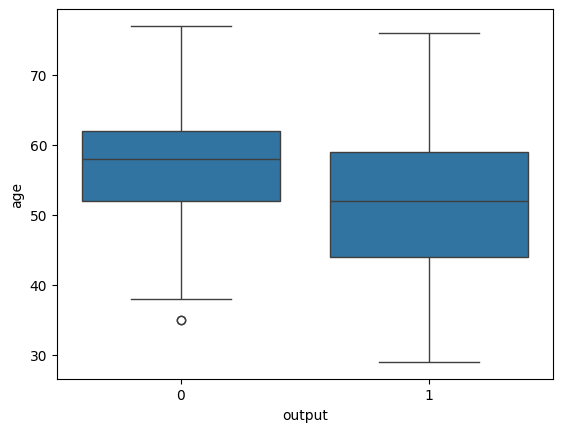

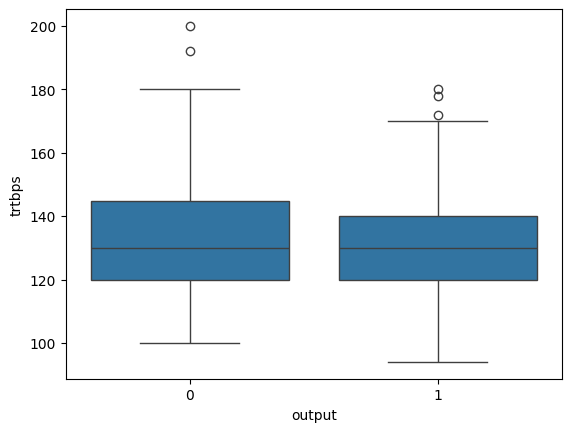

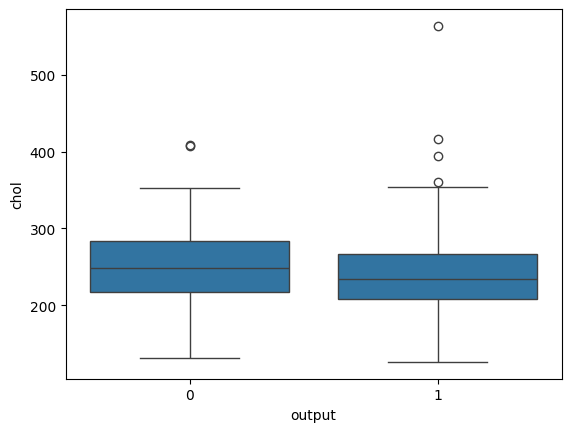

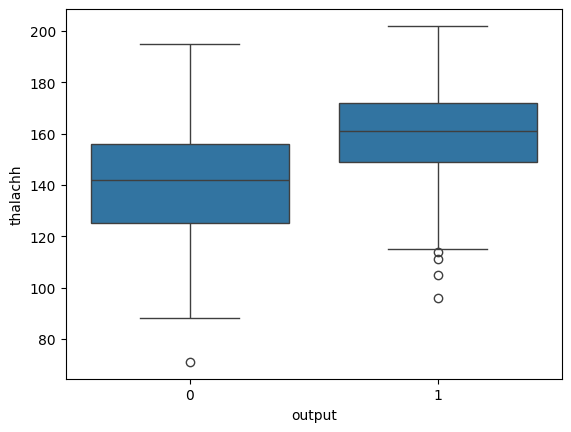

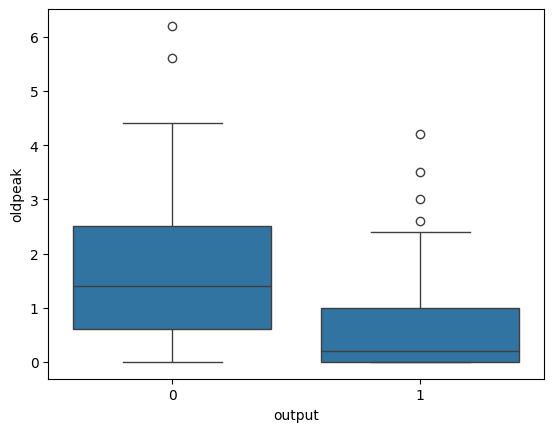

In [14]:
con_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
for col in con_cols:
    sns.boxplot(y=df[col], x=df['output'])
    plt.show()


Key findings:
- Older people are less likely to get heart attack.
- Most people with no old peak have no indication of heart disease.

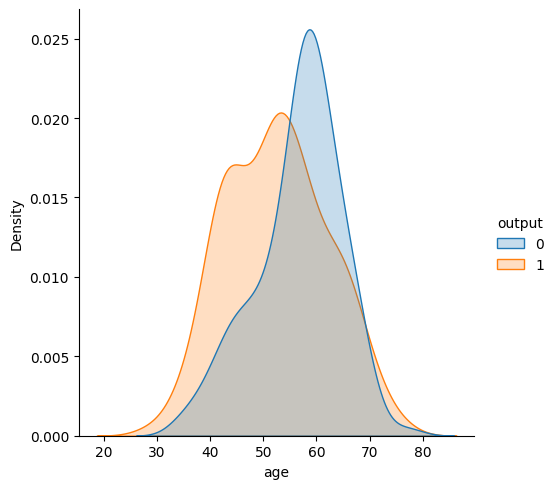

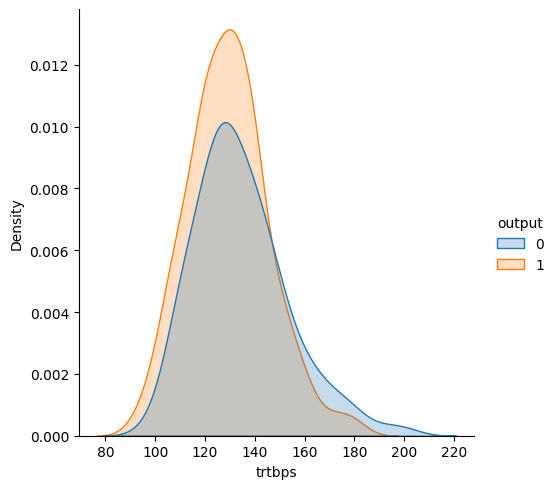

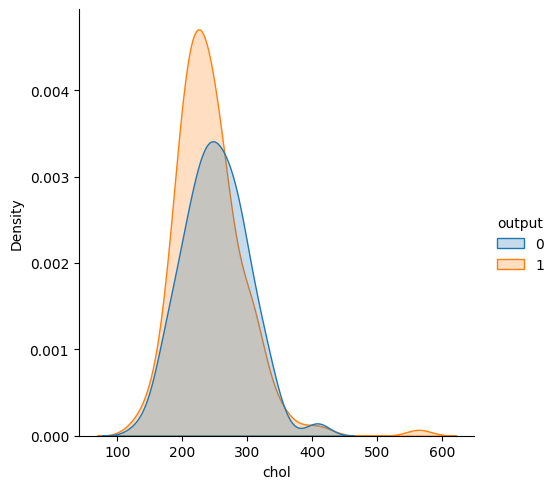

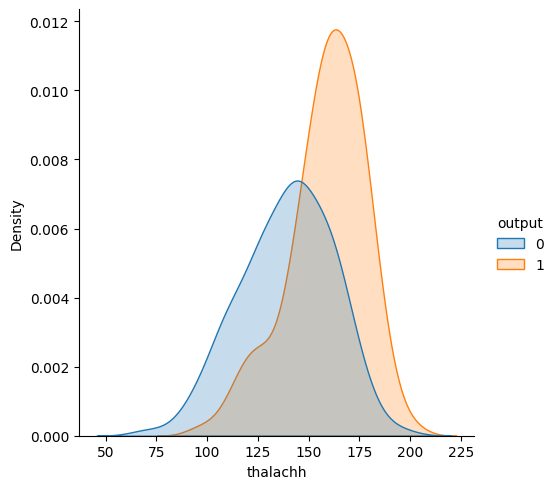

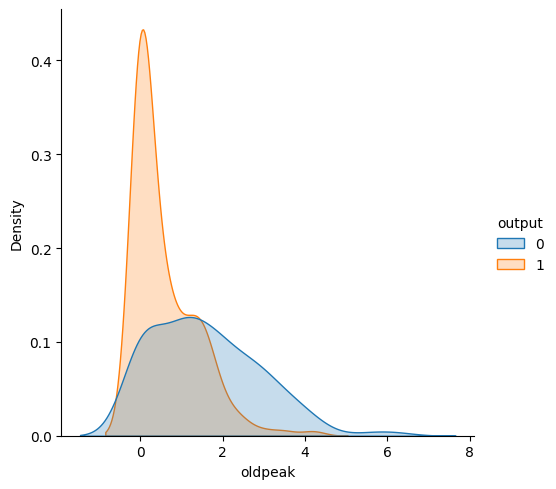

In [15]:
for col in con_cols:
    sns.displot(data=df, x=col, hue="output", kind="kde", fill=True)
    plt.show()


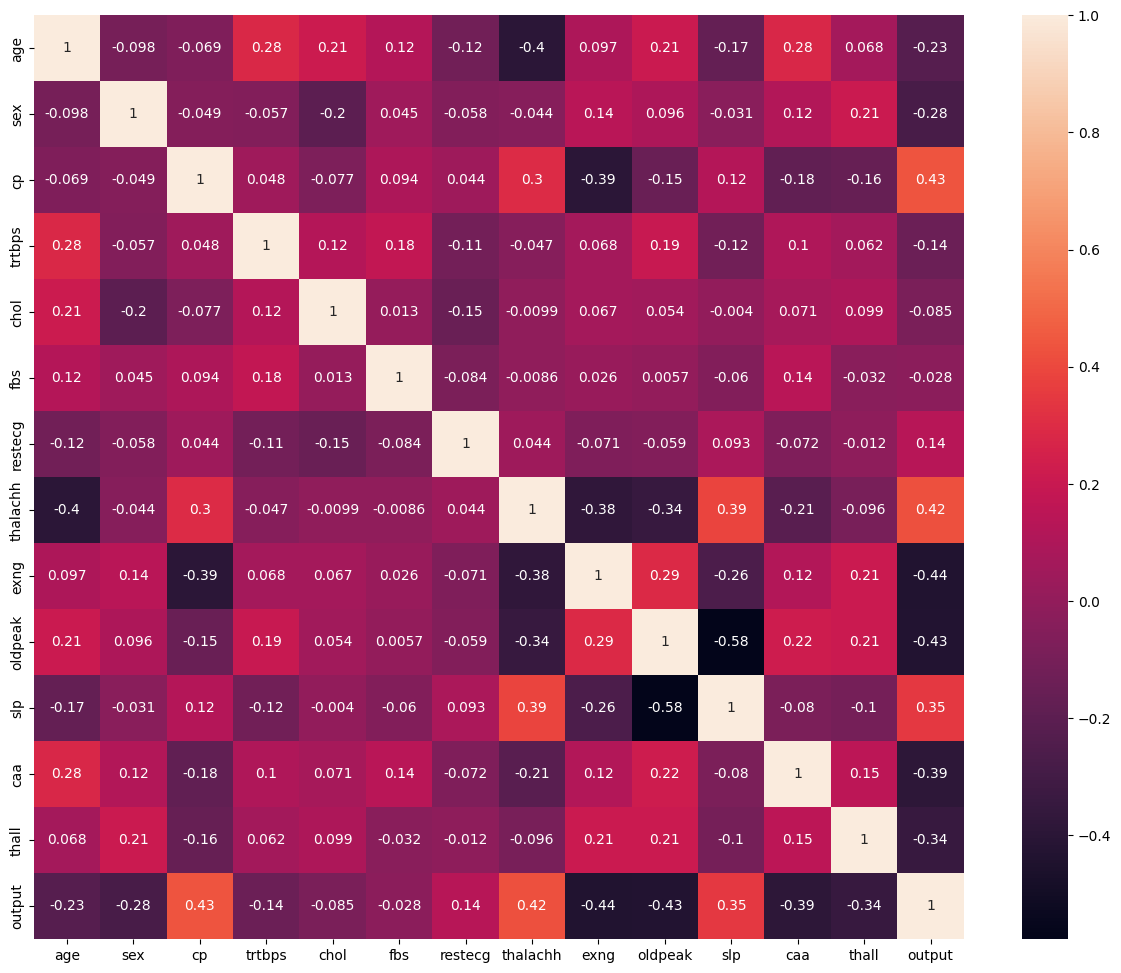

In [18]:
plt.figure(figsize=(15,12))
sns.heatmap(data=df.corr(numeric_only=True), annot=True)
plt.show()

- There's little correlations between variables.
- The highest positive correlation is 0.43 between cp and output.
- The highest negative correlation -0.58 between oldpeak and slp.
